# Проводим подготовку данных как в 4 лабораторной работе

Берем датасет который находится тут: https://www.kaggle.com/shivamp629/traincsv

Columns:

PassengerId

Survived

Pclass

Name

Sex

Age

SibSp

Parch

Ticket

Fare

Cabin

Embarked

### Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

## Загрузка и первичный анализ

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Обработка пропусков

In [11]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1, inplace = True)
y = data.Survived
data.drop('Survived', axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [13]:
# Заполняем отсутствующие значения возраста средним возрастом
data['Age'] = data['Age'].replace(0,np.nan)
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [14]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Преобразование категориальных признаков в числовые

In [15]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Кодируем признаки Pclass и Embarked в отдельные столбцы
data = pd.get_dummies(data, columns=['Pclass','Embarked'])

In [17]:
# Пол кодируем в 1/0
data['IsMale']=data.Sex.replace({'female':0,'male':1})
data.drop('Sex', axis = 1, inplace = True)

In [18]:
data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,1


## Масштабирование значений

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc2 = StandardScaler()
sc2.fit(data)
sc2_data = sc2.transform(data)

In [21]:
data = pd.DataFrame(sc2_data, columns = data.columns)

In [22]:
data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,-0.592481,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0.737695
1,0.638789,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710,-1.355574
2,-0.284663,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,-1.355574
3,0.407926,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306,-1.355574
4,0.407926,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0.737695


## Разделение выборки

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(712, 11) (712,)
(179, 11) (179,)


## Обучение модели

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=10)

In [27]:
KNeighborsClassifierObj.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [28]:
y_predicted = KNeighborsClassifierObj.predict(X_test)

## Метрики качества

In [29]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, classification_report

In [30]:
accuracy_score(y_test, y_predicted)

0.7541899441340782

In [31]:
balanced_accuracy_score(y_test, y_predicted)

0.734006092916984

In [32]:
precision_score(y_test, y_predicted)

0.8035714285714286

In [33]:
classification_report(y_test, y_predicted, output_dict = True)

{'0': {'precision': 0.7317073170731707,
  'recall': 0.8910891089108911,
  'f1-score': 0.8035714285714285,
  'support': 101},
 '1': {'precision': 0.8035714285714286,
  'recall': 0.5769230769230769,
  'f1-score': 0.6716417910447761,
  'support': 78},
 'accuracy': 0.7541899441340782,
 'macro avg': {'precision': 0.7676393728222997,
  'recall': 0.734006092916984,
  'f1-score': 0.7376066098081022,
  'support': 179},
 'weighted avg': {'precision': 0.7630224047651489,
  'recall': 0.7541899441340782,
  'f1-score': 0.7460825362413788,
  'support': 179}}

## Кросс-валидация

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
scores = cross_val_score(KNeighborsClassifierObj, 
                         X_train, y_train, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.80511427, 0.78121233, 0.76265512]), 0.7829939058832727)

## Подбор гиперпараметров

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]

In [38]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_weighted')

In [39]:
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [40]:
clf_gs.best_params_

{'n_neighbors': 5}

In [41]:
clf_gs.best_score_

0.8006250189299386

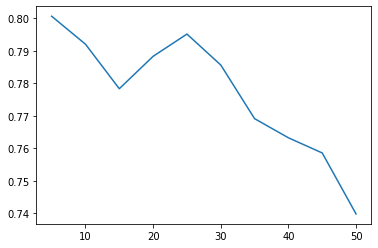

In [42]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# Переходим к выполнению 5 лабораторной работы

### Логистическая регрессия

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
LogRegression = LogisticRegression()

In [56]:

LogRegression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_predicted_lr = LogRegression.predict(X_test)

In [58]:
LogRegression.score(X_test,y_test)

0.7988826815642458

In [59]:
classification_report(y_test, y_predicted_lr, output_dict = True)

{'0': {'precision': 0.7927927927927928,
  'recall': 0.8712871287128713,
  'f1-score': 0.8301886792452831,
  'support': 101},
 '1': {'precision': 0.8088235294117647,
  'recall': 0.7051282051282052,
  'f1-score': 0.7534246575342467,
  'support': 78},
 'accuracy': 0.7988826815642458,
 'macro avg': {'precision': 0.8008081611022788,
  'recall': 0.7882076669205382,
  'f1-score': 0.7918066683897649,
  'support': 179},
 'weighted avg': {'precision': 0.7997782534424007,
  'recall': 0.7988826815642458,
  'f1-score': 0.7967384351477365,
  'support': 179}}

### SVM

In [60]:
from sklearn.svm import SVC

In [61]:
SVC_ = SVC()

In [62]:
SVC_.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_predicted_svc = SVC_.predict(X_test)
y_predicted_svc

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [64]:
SVC_.score(X_test,y_test)

0.8212290502793296

In [48]:
classification_report(y_test,y_predicted_svc, output_dict= True)

{'0': {'precision': 0.7804878048780488,
  'recall': 0.9504950495049505,
  'f1-score': 0.8571428571428571,
  'support': 101},
 '1': {'precision': 0.9107142857142857,
  'recall': 0.6538461538461539,
  'f1-score': 0.7611940298507462,
  'support': 78},
 'accuracy': 0.8212290502793296,
 'macro avg': {'precision': 0.8456010452961673,
  'recall': 0.8021706016755521,
  'f1-score': 0.8091684434968016,
  'support': 179},
 'weighted avg': {'precision': 0.8372345395441184,
  'recall': 0.8212290502793296,
  'f1-score': 0.8153327536300937,
  'support': 179}}

### Дерево решений

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DTClassifier = DecisionTreeClassifier(random_state=1)

In [51]:
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [52]:
y_predicted_DT = DTClassifier.predict(X_test)

In [53]:
DTClassifier.score(X_test,y_test)

0.7653631284916201

In [65]:
classification_report(y_predicted_DT,y_test, output_dict= True)

{'0': {'precision': 0.8415841584158416,
  'recall': 0.7657657657657657,
  'f1-score': 0.80188679245283,
  'support': 111},
 '1': {'precision': 0.6666666666666666,
  'recall': 0.7647058823529411,
  'f1-score': 0.7123287671232877,
  'support': 68},
 'accuracy': 0.7653631284916201,
 'macro avg': {'precision': 0.7541254125412541,
  'recall': 0.7652358240593534,
  'f1-score': 0.7571077797880589,
  'support': 179},
 'weighted avg': {'precision': 0.7751350554049818,
  'recall': 0.7653631284916201,
  'f1-score': 0.767864749310881,
  'support': 179}}

### Визуализация дерева решения

In [67]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [72]:
import graphviz

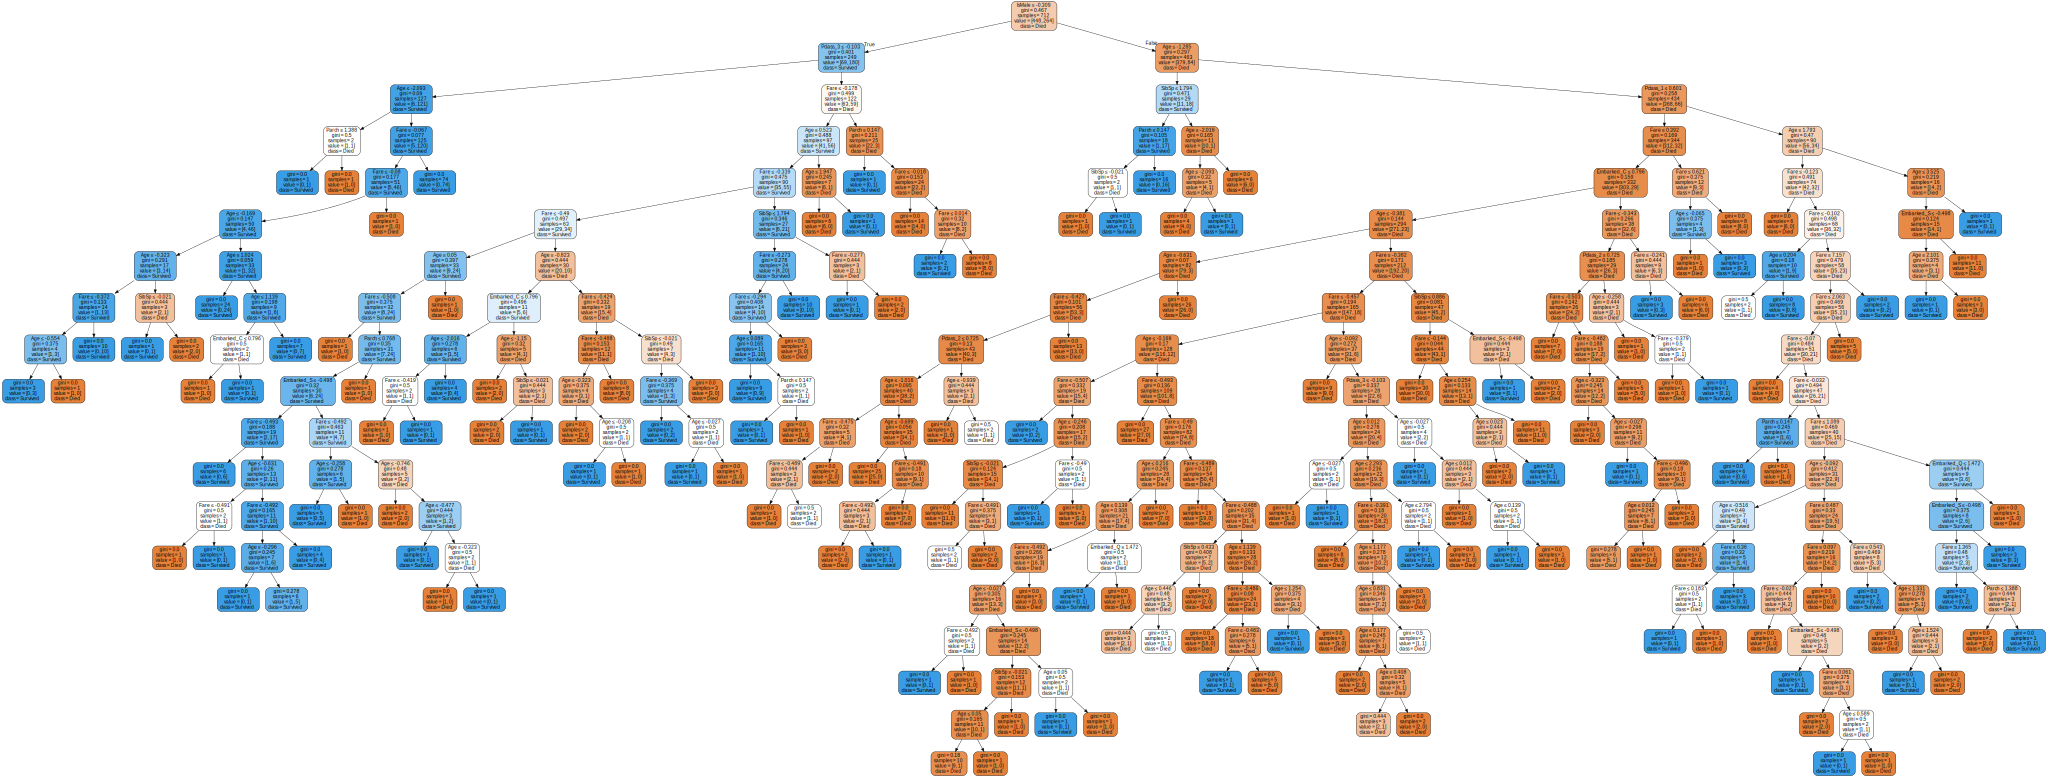

In [73]:
dot_data = export_graphviz(DTClassifier, out_file=None, 
                           feature_names=data.columns, 
                           class_names=('Died','Survived'), 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Важность признаков

In [74]:
from operator import itemgetter
importance = list(zip(data.columns,DTClassifier.feature_importances_))
importance_sort = sorted(importance, key=itemgetter(1), reverse = True)
importance_sort

[('IsMale', 0.2981714637796753),
 ('Fare', 0.2484836365757356),
 ('Age', 0.20867078911492953),
 ('Pclass_3', 0.08841475589680063),
 ('SibSp', 0.05733707694540039),
 ('Pclass_1', 0.036330862047220726),
 ('Parch', 0.027600090131412226),
 ('Embarked_S', 0.014839870627026575),
 ('Embarked_C', 0.01135273051580323),
 ('Embarked_Q', 0.00628091941368676),
 ('Pclass_2', 0.0025178049523090834)]

In [75]:
DTClassifier2 = DecisionTreeClassifier(random_state=1)
DTClassifier2.fit(X_train[['Age']],y_train)
DTClassifier2.score(X_test[['Age']],y_test)

0.5642458100558659

In [76]:
DTClassifier2 = DecisionTreeClassifier(random_state=1)
DTClassifier2.fit(X_train[['IsMale']],y_train)
DTClassifier2.score(X_test[['IsMale']],y_test)

0.7932960893854749

In [77]:
y_predicted_DT2 = DTClassifier2.predict(X_test[['IsMale']])
classification_report(y_predicted_DT2,y_test, output_dict= True)

{'0': {'precision': 0.8811881188118812,
  'recall': 0.7807017543859649,
  'f1-score': 0.8279069767441861,
  'support': 114},
 '1': {'precision': 0.6794871794871795,
  'recall': 0.8153846153846154,
  'f1-score': 0.7412587412587412,
  'support': 65},
 'accuracy': 0.7932960893854749,
 'macro avg': {'precision': 0.7803376491495304,
  'recall': 0.7980431848852901,
  'f1-score': 0.7845828590014636,
  'support': 179},
 'weighted avg': {'precision': 0.8079447609565426,
  'recall': 0.7932960893854749,
  'f1-score': 0.7964425336908122,
  'support': 179}}

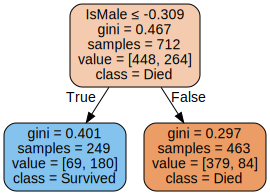

In [78]:
dot_data1 = export_graphviz(DTClassifier2, out_file=None, 
                           feature_names=['IsMale'], 
                           class_names=('Died','Survived'), 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data1)  
graph

### Сравнение качества полученных моделей

Лучшей из построенных моделей является модель SVM, однако дерево, построенное на признаке "IsMale" тоже показывает хорошие результаты

# Переходим к выполнению 6 лабораторной работы

## Случайный лес

In [79]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [80]:
forest = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [81]:
forest.score(X_test,y_test)

0.7821229050279329

In [82]:
y_predicted_forest = forest.predict(X_test)

In [83]:
classification_report(y_predicted_forest,y_test, output_dict=True)

{'0': {'precision': 0.8415841584158416,
  'recall': 0.7870370370370371,
  'f1-score': 0.8133971291866029,
  'support': 108},
 '1': {'precision': 0.7051282051282052,
  'recall': 0.7746478873239436,
  'f1-score': 0.738255033557047,
  'support': 71},
 'accuracy': 0.7821229050279329,
 'macro avg': {'precision': 0.7733561817720234,
  'recall': 0.7808424621804904,
  'f1-score': 0.775826081371825,
  'support': 179},
 'weighted avg': {'precision': 0.7874591713576171,
  'recall': 0.7821229050279329,
  'f1-score': 0.7835921638810248,
  'support': 179}}

## Градиентный бустинг

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ab1 = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=1)
ab1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [85]:
ab1.score(X_test,y_test)

0.776536312849162

In [86]:
y_predicted_ab = ab1.predict(X_test)

In [87]:
classification_report(y_predicted_ab,y_test, output_dict=True)

{'0': {'precision': 0.8217821782178217,
  'recall': 0.7904761904761904,
  'f1-score': 0.8058252427184466,
  'support': 105},
 '1': {'precision': 0.717948717948718,
  'recall': 0.7567567567567568,
  'f1-score': 0.736842105263158,
  'support': 74},
 'accuracy': 0.776536312849162,
 'macro avg': {'precision': 0.7698654480832698,
  'recall': 0.7736164736164737,
  'f1-score': 0.7713336739908023,
  'support': 179},
 'weighted avg': {'precision': 0.7788566136372983,
  'recall': 0.776536312849162,
  'f1-score': 0.7773070741615117,
  'support': 179}}

## Сравнение качества полученных моделей

Построенная модель случайного леса дает лучшие результаты по всем метрикам качества модели.